Елисеев Иван

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sls

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

Импортируем датасет.

In [ ]:
df = pd.read_csv('/content/Train.csv')
df

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,EID_16328,F,23.0,5,Married,Franklin,Operarions,Behavioral,4.0,1,...,type3,3.0,1,0.7516,-0.4537,2.0,3,7,3,0.7839
6996,EID_8387,F,44.0,1,Married,Lebanon,R&D,Analytical,16.0,2,...,type3,3.0,2,-0.1048,-2.7762,2.0,4,8,4,0.1055
6997,EID_8077,F,49.0,3,Single,Springfield,IT,Directive,10.0,1,...,type2,4.0,2,-0.1048,-0.4537,2.0,4,8,3,0.7847
6998,EID_19597,F,47.0,3,Married,Washington,Sales,Behavioral,24.0,1,...,type0,2.0,4,0.7516,1.8688,2.0,3,6,3,0.4162


In [ ]:
df.isna().sum()

,0
Employee_ID,0
Gender,0
Age,412
Education_Level,0
Relationship_Status,0
Hometown,0
Unit,0
Decision_skill_possess,0
Time_of_service,144
Time_since_promotion,0


In [ ]:
new_df = df.copy()


for column in new_df.select_dtypes(include=['float64', 'int64']).columns:
    new_df[column].fillna(new_df[column].mean(), inplace=True)

new_df.isna().sum()


<ipython-input-4-afafe06cefc0>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df[column].fillna(new_df[column].mean(), inplace=True)


,0
Employee_ID,0
Gender,0
Age,0
Education_Level,0
Relationship_Status,0
Hometown,0
Unit,0
Decision_skill_possess,0
Time_of_service,0
Time_since_promotion,0


In [ ]:
X = pd.concat([new_df.loc[:,"Age":"Education_Level"], new_df.loc[:,"Time_of_service":"Pay_Scale"], new_df.loc[:,"Work_Life_balance":"VAR7"]], axis = 1)
y = new_df["Attrition_rate"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [ ]:
lig_reg = LinearRegression()
lig_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
w0 = lig_reg.intercept_
w0

0.21040726224623352

In [ ]:
w1 = lig_reg.coef_
w1

array([-2.25236689e-04, -9.80445348e-04, -8.10669844e-05,  4.30887823e-03,
       -1.08478443e-05, -3.10280648e-03,  4.64858075e-03, -2.80636405e-04,
        7.32174970e-04, -2.76143103e-03, -5.09188029e-03, -2.11459832e-03,
       -6.58993830e-03, -1.99361479e-03,  3.00669961e-04, -1.81590230e-03])

In [ ]:
y_pred = lig_reg.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))


Mean Absolute Error: 0.12576605885037007
Mean Squared Error: 0.03461996119865109
R2 score: -0.004254067024644925


Так как R2 < 0, то мы можем сделать вывод о том, что усреднение будет работать лучше

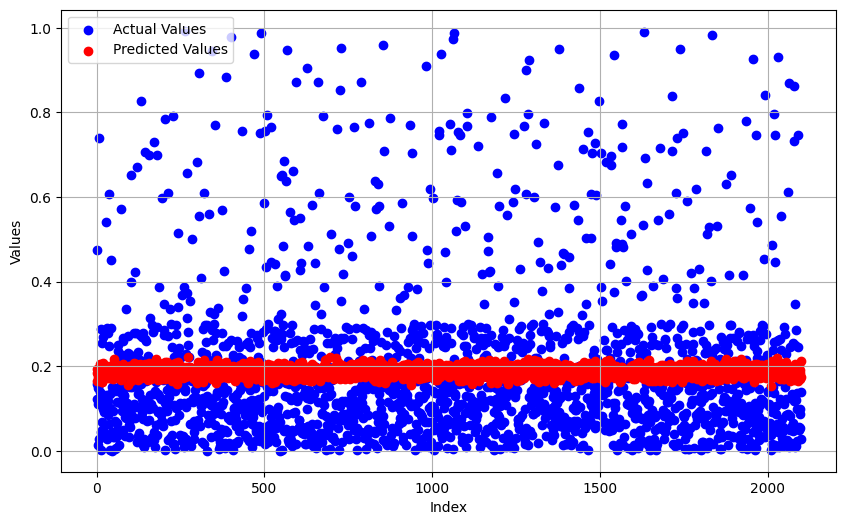

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Values')


plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)


plt.show()

In [ ]:
# покажем что простое усреднение работает лучше

# X_train, X_test, y_train, y_test
val = y_test.mean()
y_pred = np.full(y_test.shape, val)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 0.12477445768707482
Mean Squared Error: 0.03399855466672108
R2 score: 0.0


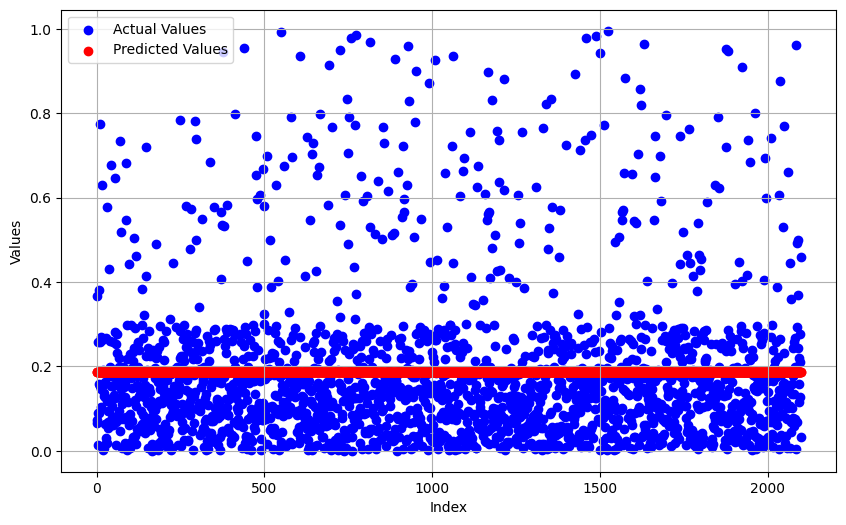

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Values')


plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)


plt.show()